<a href="https://colab.research.google.com/github/Ferhadaghayev/Mobile-App-Users-Dataset/blob/main/Mobile_App_Users_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [317]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 30

data = {
    "user_id": range(1, n+1),
    "age": np.random.randint(16, 60, n),
    "country": np.random.choice(["FR", "US", "GB", "TR", "DE", "RU"], n),
    "payment_amount": np.round(np.random.exponential(scale=50, size=n), 2),
    "subscription": np.random.choice(["Yes", "No"], n, p=[0.4, 0.6]),
    "app_rating": np.random.randint(1, 6, n)
}

df = pd.DataFrame(data)
print(df["app_rating"].value_counts())
df

app_rating
4    10
5     7
1     6
3     4
2     3
Name: count, dtype: int64


,user_id,age,country,payment_amount,subscription,app_rating
0,1,54,GB,6.51,No,1
1,2,44,US,34.18,Yes,4
2,3,30,TR,1.75,Yes,5
3,4,58,TR,120.02,No,4
4,5,23,RU,14.97,No,5
5,6,36,RU,54.31,No,5
6,7,54,RU,18.68,No,3
7,8,34,GB,36.71,Yes,5
8,9,38,TR,39.56,Yes,4
9,10,26,TR,10.22,Yes,5


In [318]:
#Sətir və sütun sayı - Number of rows and columns
print('Colunms',df.shape[1])
print('Rows',df.shape[0])

Colunms 6
Rows 30


In [319]:
#Count of total users -- Ümumi istifadəçi sayı
total_users = df["user_id"].nunique()
print("Ümumi istifadəçi sayı:", total_users)

Ümumi istifadəçi sayı: 30


In [320]:
#Number and percentage of subscribers -- Abunə olanların sayı və faizi
sub_count = df[df["subscription"] == "Yes"].shape[0]
sub_percent = sub_count / total_users * 100
print(f"Subscription edənlər: {sub_count}, Faiz: {sub_percent:.1f}%")

Subscription edənlər: 12, Faiz: 40.0%


In [321]:
#Ölkələr üzrə istifadəçi sayı -- Number of users by country
df["country"].value_counts()

,count
country,
TR,9
US,6
GB,4
RU,4
FR,4
DE,3


In [322]:
#Maksimum,minimum və ortalama ödəniş məbləği -- Maximum, minimum and average payment amount
df["payment_amount"].describe()

,payment_amount
count,30.000000
mean,52.170000
std,56.419017
min,1.750000
25%,11.925000
50%,29.395000
75%,79.417500
max,216.710000


In [323]:
df["app_rating"].value_counts().reset_index()

,app_rating,count
0,4,10
1,5,7
2,1,6
3,3,4
4,2,3


In [324]:
#Ölkələr üzrə ortalama app rating-i -- Average app rating by country
df.groupby("country")["app_rating"].mean().sort_values(ascending=False)

,app_rating
country,
RU,4.250000
FR,3.750000
DE,3.333333
TR,3.333333
GB,2.750000
US,2.666667


In [325]:
#Ödəniş etməyən və aşağı reytinqli istifadəçilər -- Non-paying and low-rated users
risky_users = df[(df["subscription"] == "No") & (df["app_rating"] <= 2)]
risky_users


,user_id,age,country,payment_amount,subscription,app_rating
0,1,54,GB,6.51,No,1
16,17,37,US,4.63,No,1
24,25,48,US,16.49,No,2
26,27,37,US,7.59,No,1
27,28,59,TR,81.02,No,1


In [326]:
#Yaş qruplarına görə ortalama ödəniş məbləğləri -- Average payment amounts by age group
bins = [15, 25, 35, 45, 60]
labels = ["16-25", "26-35", "36-45", "46-60"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)
df.groupby("age_group")["payment_amount"].mean().round()

/tmp/ipython-input-2074221972.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["payment_amount"].mean().round()


,payment_amount
age_group,
16-25,60.0
26-35,52.0
36-45,44.0
46-60,59.0


/tmp/ipython-input-3231759287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="country", palette=colors)


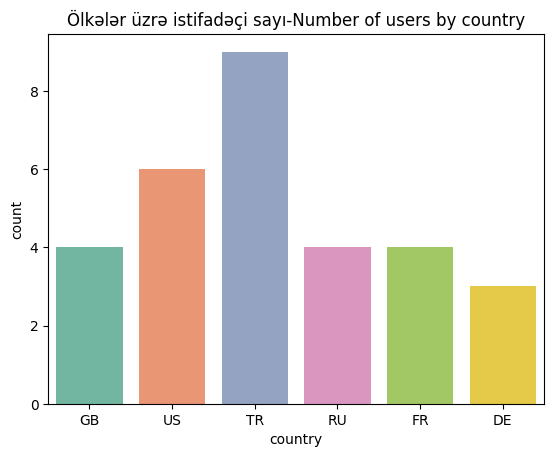

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_countries = df['country'].nunique()

colors = sns.color_palette("Set2", unique_countries)

sns.countplot(data=df, x="country", palette=colors)
plt.title("Ölkələr üzrə istifadəçi sayı-Number of users by country")
plt.show()


/tmp/ipython-input-2024423465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


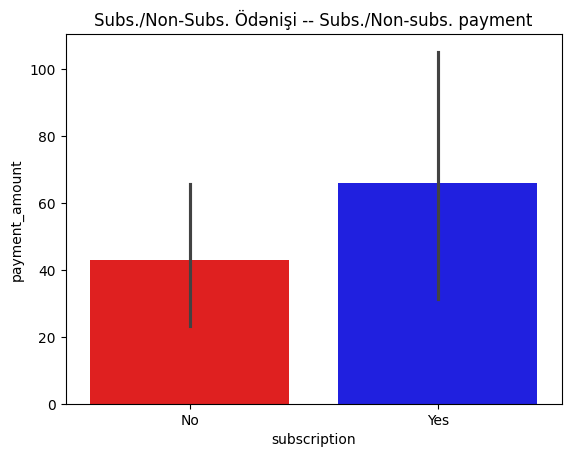

In [328]:
#Subscription/Non-Subscription Ödənişi -- Subscription/non-subscription payment
sns.barplot(
    data=df,
    x="subscription",
    y="payment_amount",
    palette={"Yes": "blue", "No": "red"}
)

plt.title("Subs./Non-Subs. Ödənişi -- Subs./Non-subs. payment")
plt.show()

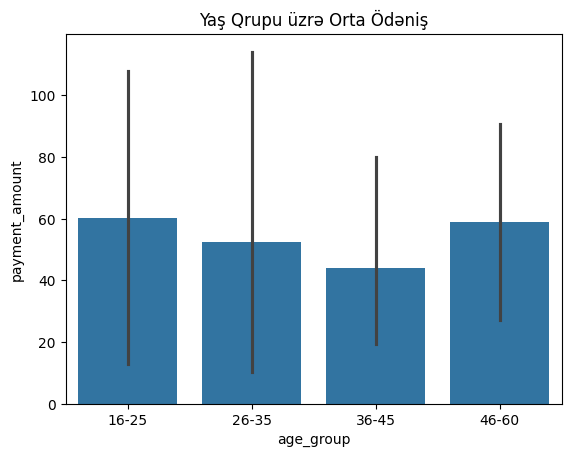

In [329]:
#Yaş Qrupu üzrə Orta Ödəniş -- Average Pay by Age Group
sns.barplot(data=df, x="age_group", y="payment_amount")
plt.title("Yaş Qrupu üzrə Orta Ödəniş")
plt.show()

/tmp/ipython-input-2908066012.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="age_group", y="payment_amount", palette="viridis", ci=None)
/tmp/ipython-input-2908066012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="age_group", y="payment_amount", palette="viridis", ci=None)


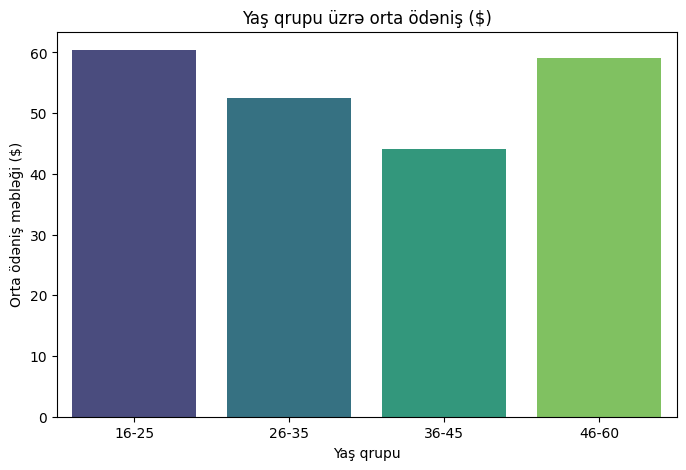

In [330]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="age_group", y="payment_amount", palette="viridis", ci=None)
plt.title("Yaş qrupu üzrə orta ödəniş ($)")
plt.xlabel("Yaş qrupu")
plt.ylabel("Orta ödəniş məbləği ($)")

plt.show()

In [331]:
#Verilən tarix araılğında qeydiyyat tarixi sütunu yaradırıq--Creating a registration date column when searching for a given date
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2025-12-31")

n = len(df)
df['signup_date'] = signup_dates

In [332]:
# cohort month = istifadəçinin ilk qeydiyyat ayı -- user's first month of registration
df['cohort_month'] = df['signup_date'].dt.to_period('M')
df.head()

,user_id,age,country,payment_amount,subscription,app_rating,age_group,signup_date,cohort_month
0,1,54,GB,6.51,No,1,46-60,2024-03-26,2024-03
1,2,44,US,34.18,Yes,4,36-45,2025-11-16,2025-11
2,3,30,TR,1.75,Yes,5,26-35,2025-03-04,2025-03
3,4,58,TR,120.02,No,4,46-60,2025-05-03,2025-05
4,5,23,RU,14.97,No,5,16-25,2023-02-05,2023-02


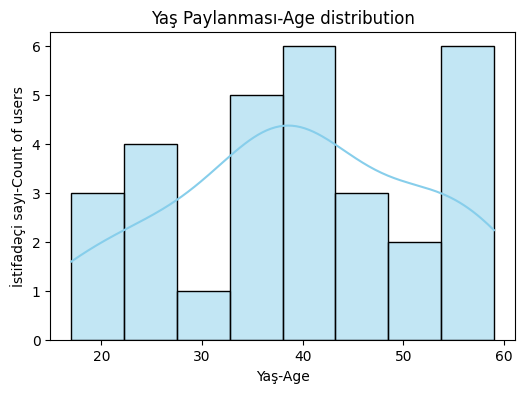

In [333]:
#İstifadəçilərin yaş paylanması -- Age distribution of users
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=8, kde=True, color='skyblue')
plt.title("Yaş Paylanması-Age distribution")
plt.xlabel("Yaş-Age")
plt.ylabel("İstifadəçi sayı-Count of users")
plt.show()

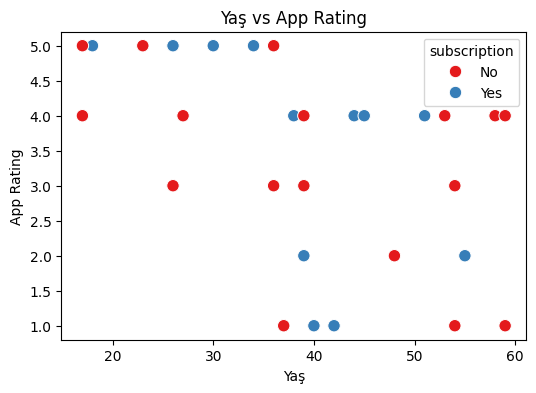

In [334]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='app_rating', hue='subscription', data=df, palette='Set1', s=80)
plt.title("Yaş vs App Rating")
plt.xlabel("Yaş")
plt.ylabel("App Rating")
plt.show()

/tmp/ipython-input-4244076146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='app_rating', data=df, palette='coolwarm')


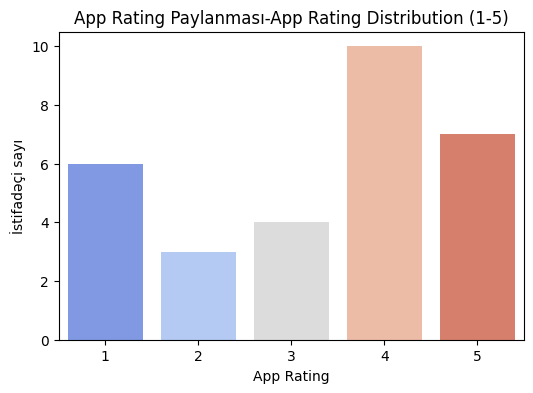

In [335]:
plt.figure(figsize=(6,4))
sns.countplot(x='app_rating', data=df, palette='coolwarm')
plt.title("App Rating Paylanması-App Rating Distribution (1-5)")
plt.xlabel("App Rating")
plt.ylabel("İstifadəçi sayı")
plt.show()

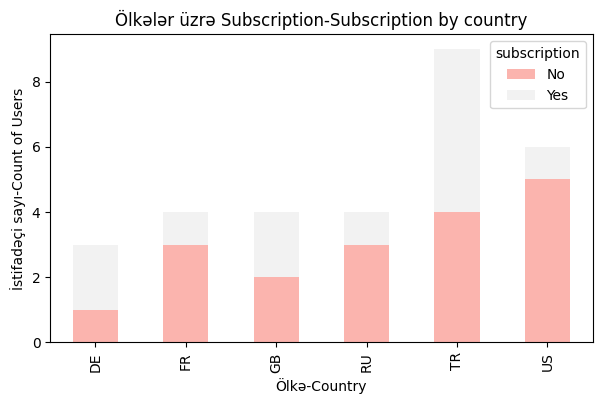

In [336]:
country_sub = df.groupby(['country', 'subscription']).size().unstack()
country_sub.plot(kind='bar', stacked=True, figsize=(7,4), colormap='Pastel1')
plt.title("Ölkələr üzrə Subscription-Subscription by country")
plt.ylabel("İstifadəçi sayı-Count of Users")
plt.xlabel("Ölkə-Country")
plt.show()

/tmp/ipython-input-3539945855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subscription', y='payment_amount', data=df, palette='Set2')


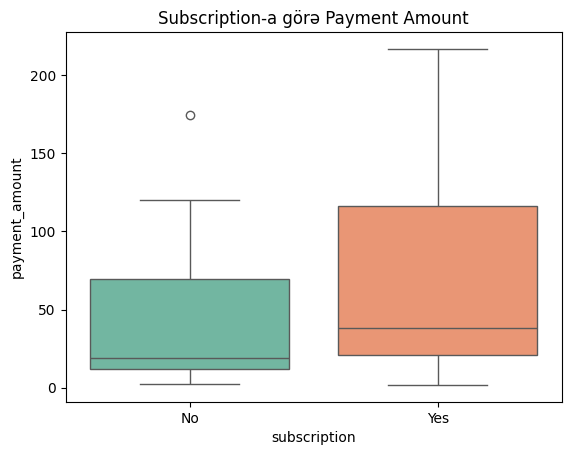

In [337]:
#Abunə olan istifadəçilər daha çox ödəniş edib-Subscribers paid more
sns.boxplot(x='subscription', y='payment_amount', data=df, palette='Set2')
plt.title("Subscription-a görə Payment Amount")
plt.show()

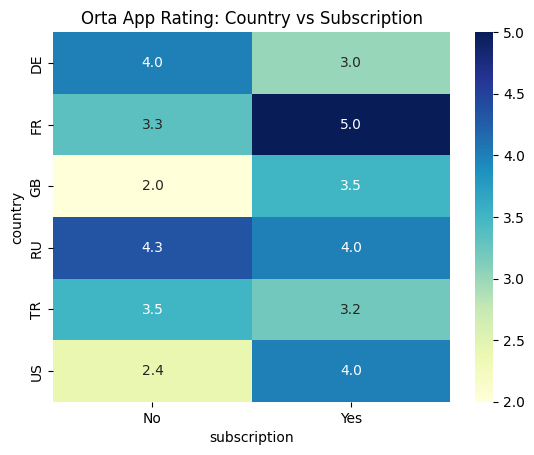

In [338]:
#Hər ölkədə subscription sahibi olan və olmayan istifadəçilərin ortalama app rating-i
#Average app rating of users with and without subscriptions in each country

pivot = df.pivot_table(values='app_rating', index='country', columns='subscription', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Orta App Rating: Country vs Subscription")
plt.show()

In [339]:
max_rating = df['app_rating'].max()

top_raters = df[df['app_rating'] == max_rating]

age_min = top_raters['age'].min()
age_max = top_raters['age'].max()

print(f"app_rating-ə ən çox bal verənlər {age_min} - {age_max} yaş aralığındadır.")

app_rating-ə ən çox bal verənlər 17 - 36 yaş aralığındadır.


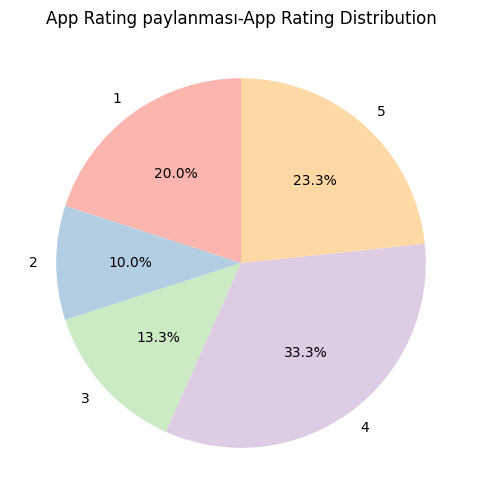

In [340]:
plt.figure(figsize=(6,6))
df['app_rating'].value_counts().sort_index().plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
plt.title("App Rating paylanması-App Rating Distribution")
plt.ylabel("")
plt.show()

In [341]:
#Hər ölkədən 26-35 yaş arası payment amount cəmi -- Total payment amount for people aged 26-35 from each country
age_26_35 = df[df['age'].between(26, 35)]

total_by_country = age_26_35.groupby('country')['payment_amount'].sum()

print(total_by_country)

country
DE     39.12
FR    174.64
GB     36.71
TR     11.97
Name: payment_amount, dtype: float64
